In [1]:
import numpy as np
import pandas as pd
from  sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt

In [2]:
df1=pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')
df2=pd.read_csv('IPL Matches 2008-2020.csv')


In [3]:
df1.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [4]:
df2.head()


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [5]:
df1.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [6]:
df2.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

### adding the year column 


In [7]:
Year=[]
for i in df2['date']:
    Year.append(i.split('-')[0])


df2.insert(2,'Year',Year)

In [8]:
df2.head()


,id,city,Year,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


### 1) what was the count of matches played in each season


In [9]:
years=list(df2['Year'].unique())



In [10]:
noof_matches={}
for i in years:
    x=df2[df2['Year']==i]
    noof_matches[i]=x['Year'].notnull().sum() #Adding Years and count of matches to the dictionary.

df_cnt=pd.DataFrame(noof_matches.items(),columns=['Years','Total matches'])
df_cnt.sort_values(by='Total matches',ascending=False) #sorting and printing the years and their match count



,Years,Total matches
5,2013,76
4,2012,74
3,2011,73
2,2010,60
6,2014,60
8,2016,60
10,2018,60
11,2019,60
12,2020,60
7,2015,59


### visuvallising using the bargraph

In [11]:
# creating function to add the lables
def addlables(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

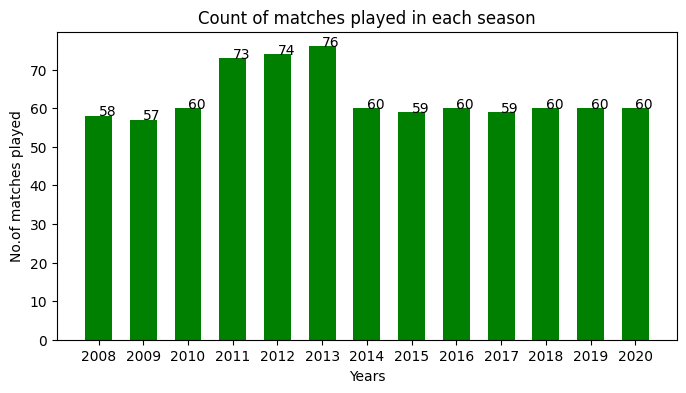

In [12]:
key=list(noof_matches.keys())
val=list(noof_matches.values())
plt.figure(figsize=(8,4))
addlables(key,val)
plt.bar(key,val,color='g',width=0.6)
plt.title("Count of matches played in each season")
plt.xlabel("Years")
plt.ylabel('No.of matches played')
plt.show()

## 2)How many runs were scored in every season?

In [13]:
Total_runs={}
runs=0
for year in years:
    df_prcd=df2[df2['Year']==year]
    for i in df_prcd['id']:
        runs_df=df1[df1['id']==i]
        runs=runs+runs_df['total_runs'].sum()
    Total_runs[year]=runs #Adding years and their total runs to dictionary

df_truns=pd.DataFrame(Total_runs.items(),columns=['Years','Total runs'])
df_truns.sort_values(by='Total runs',ascending=False) #Sorting and printing all the years and scored runs

,Years,Total runs
12,2020,252794
11,2019,233442
10,2018,214042
9,2017,194141
8,2016,175372
7,2015,156510
6,2014,138178
5,2013,119269
4,2012,96728
3,2011,74275


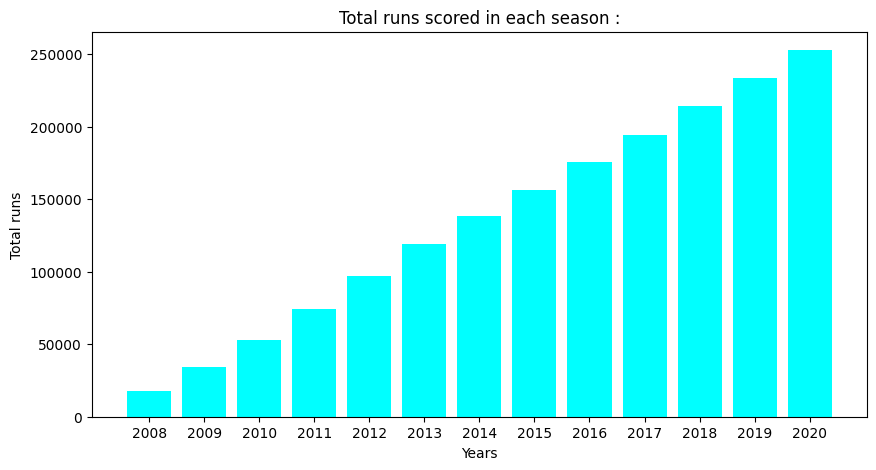

In [14]:
plt.figure(figsize=(10,5))
plt.bar(Total_runs.keys(),Total_runs.values(),color='cyan')
plt.xlabel('Years')
plt.ylabel('Total runs')
plt.title('Total runs scored in each season :')
plt.show()


## 3)What were the runs scored per match in different seasons


In [15]:
avg_runs={}
for year in years:
    avg_runs[year]=int(Total_runs[year]/noof_matches[year])


df_avgruns=pd.DataFrame(avg_runs.items(),columns=['Years','Average runs'])
df_avgruns.sort_values(by='Average runs',ascending=False)

,Years,Average runs
12,2020,4213
11,2019,3890
10,2018,3567
9,2017,3290
8,2016,2922
7,2015,2652
6,2014,2302
5,2013,1569
4,2012,1307
3,2011,1017


### visuvalising using bar graph

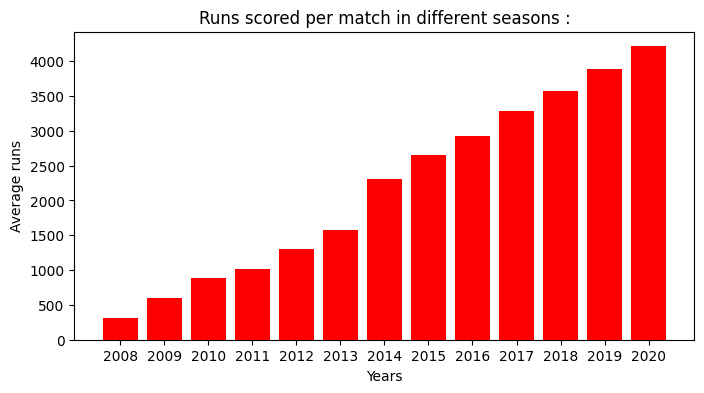

In [16]:
plt.figure(figsize=(8,4))
plt.bar(avg_runs.keys(),avg_runs.values(),color='r')
plt.xlabel('Years')
plt.ylabel('Average runs')
plt.title('Runs scored per match in different seasons :')
plt.show()

## 4)Who has umpired the most


In [17]:
ump1=df2['umpire1'].value_counts()
ump2=dict(df2['umpire2'].value_counts())

final_umpcnt={}
for i in ump1.keys():
    for j in ump2.keys():
        if i==j:
            final_umpcnt[i]=ump1[i]+ump2[i]
            
            
df_umpcnt=pd.DataFrame(final_umpcnt.items(),columns=['Umpires','Umpired matches'])
df_umpcnt.sort_values(by='Umpired matches',ascending=False).head(10).reset_index(drop=True)

,Umpires,Umpired matches
0,S Ravi,121
1,HDPK Dharmasena,94
2,AK Chaudhary,87
3,C Shamshuddin,82
4,M Erasmus,65
5,CK Nandan,57
6,Nitin Menon,57
7,SJA Taufel,55
8,VA Kulkarni,50
9,BNJ Oxenford,48


## 5)Which team has won the the most no.of tosses?

In [18]:
tosses={}
cnt=0
for team in df2['toss_winner'].unique():
    for x in df2['toss_winner']:
        if x==team:
            cnt=cnt+1
    tosses[team]=cnt
    cnt=0


df_tosswin=pd.DataFrame(tosses.items(),columns=['Teams','No.of toss wins'])
df_tosswin=df_tosswin.sort_values(by='No.of toss wins',ascending=False).reset_index(drop=True)
df_tosswin.head(10)

,Teams,No.of toss wins
0,Mumbai Indians,106
1,Kolkata Knight Riders,98
2,Chennai Super Kings,97
3,Royal Challengers Bangalore,87
4,Rajasthan Royals,87
5,Kings XI Punjab,85
6,Delhi Daredevils,80
7,Sunrisers Hyderabad,57
8,Deccan Chargers,43
9,Pune Warriors,20


In [19]:
print('-'*45)
print(df_tosswin['Teams'].tolist()[0],'won most number of tosses')
print('-'*45)

---------------------------------------------
Mumbai Indians won most number of tosses
---------------------------------------------


### bar graph represantation

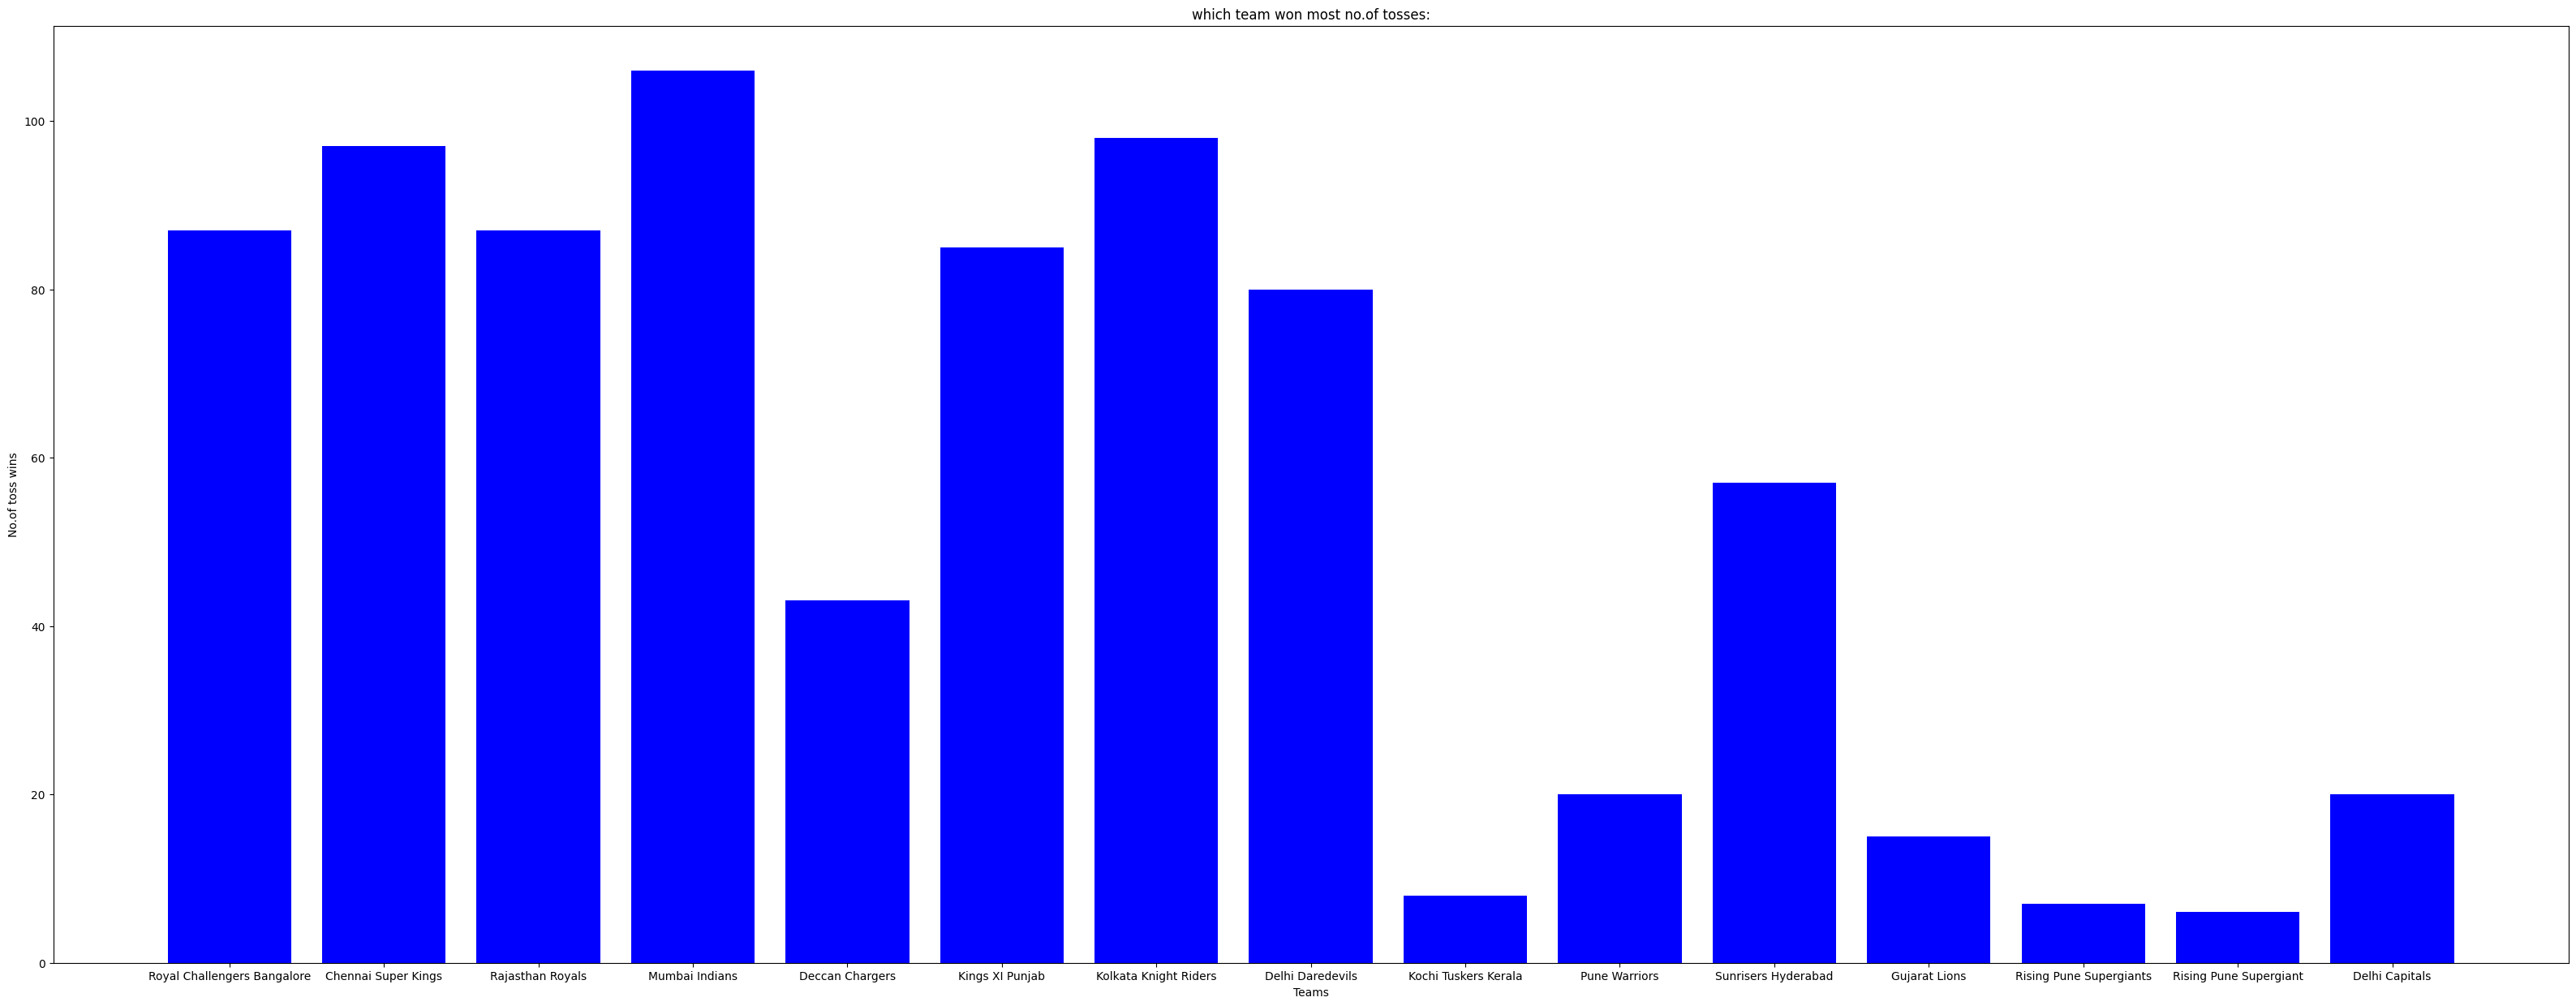

In [20]:
plt.figure(figsize=(40,15))
plt.bar(tosses.keys(),tosses.values(),color='b')
plt.xlabel('Teams')
plt.ylabel('No.of toss wins')
plt.title('which team won most no.of tosses:')
plt.show()

## 6)What does the team decide after winning the toss

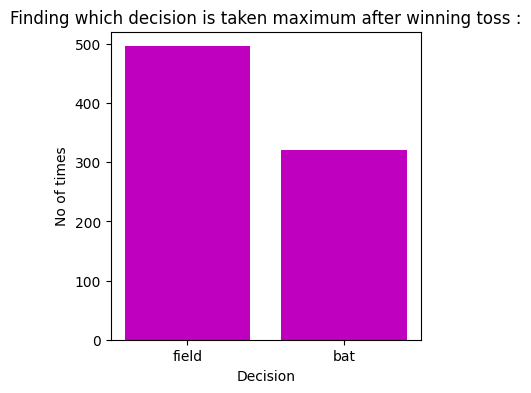

In [21]:

toss=dict(df2['toss_decision'].value_counts())
plt.figure(figsize=(4,4))
plt.bar(toss.keys(),toss.values(),color='m')
plt.xlabel('Decision')
plt.ylabel('No of times')
plt.title('Finding which decision is taken maximum after winning toss :')
plt.show()


## 7)How does the toss decision vary across the seasons

In [22]:
batting_cnt=[]
fielding_cnt=[]
toss_decision={}
for year in years:
    df=df2[df2['Year']==year]
    toss_decision[year]=dict(df['toss_decision'].value_counts())
YEARS=list(toss_decision.keys())
x=list(toss_decision.values())
for i in x:
    batting_cnt.append(list(i.values())[1])
    fielding_cnt.append(list(i.values())[0])

df = pd.DataFrame(list(zip(YEARS,batting_cnt,fielding_cnt)), columns =['Year', 'Batting_cnt','Fielding_cnt']) 
df


,Year,Batting_cnt,Fielding_cnt
0,2008,26,32
1,2009,22,35
2,2010,21,39
3,2011,25,48
4,2012,37,37
5,2013,31,45
6,2014,19,41
7,2015,25,34
8,2016,11,49
9,2017,11,48


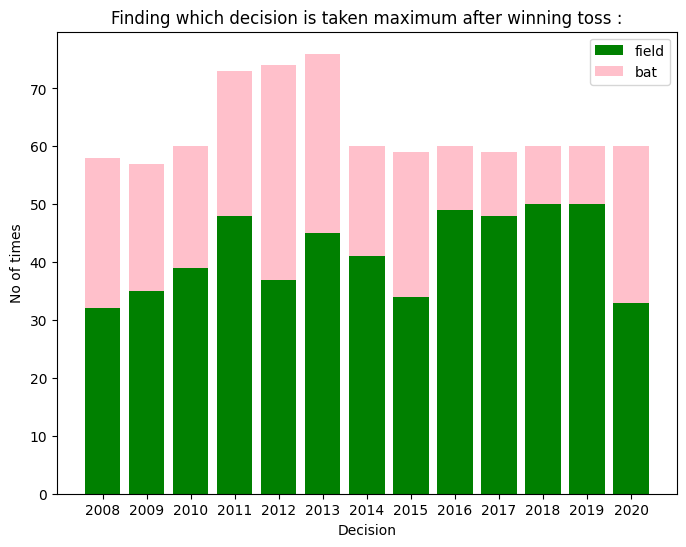

In [23]:
plt.figure(figsize=(8,6))
plt.bar(YEARS,fielding_cnt,color='g')
plt.bar(YEARS,batting_cnt,bottom=fielding_cnt,color='pink')
plt.xlabel('Decision')
plt.ylabel('No of times')
plt.title('Finding which decision is taken maximum after winning toss :')
plt.legend(['field','bat'])
plt.show()

## 8)Does winning the toss imply winning the game

In [24]:

winning=0
for i in df2['toss_winner'].unique(): 
    df=df2[df2['toss_winner']==i]
    for j in df['winner']:
        if i==j: 
            winning+=1

In [25]:
loosing=len(df2)-winning #Finding no.of wins and losses
toss_impli_result=[]
toss_impli_result.extend([winning,loosing])
toss_impli_result

[418, 398]

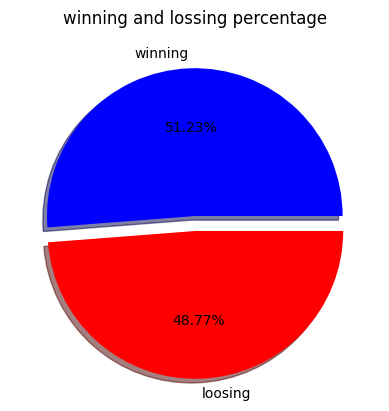

In [26]:
explodes = [0.001,.1]
labels=['winning','loosing']
colors=['b','r']
plt.title('winning and lossing percentage')
plt.pie(toss_impli_result, labels= labels, explode = explodes, shadow = True,colors=colors,autopct = '%1.2f%%')
plt.show()

## 9)How manny times has the chasing team won the match?

In [27]:
chase_won_matches=len(df2[df2['result']=='wickets'])
print('-'*50)
print('No.of matches won by chasing teams are : ',chase_won_matches)
print('-'*50)

--------------------------------------------------
No.of matches won by chasing teams are :  435
--------------------------------------------------


## 10)Which all teams had won this tournament?

In [28]:
winners=[]
c=0
for year in years:
    data=df2[df2['Year']==year]
    for i in data['winner']:
        continue
    winners.append(i)
    

print('='*35)
print('Teams who won the ipl are :')
print('-'*35)
for i in set(winners):
    c+=1
    print(c,'.',i)
print('='*35)


Teams who won the ipl are :
-----------------------------------
1 . Sunrisers Hyderabad
2 . Kolkata Knight Riders
3 . Deccan Chargers
4 . Rajasthan Royals
5 . Mumbai Indians
6 . Chennai Super Kings


## 11)Which team has played the most no.of matches?

In [29]:
Teams=df2['team1'].unique()

team_matches={}
for team in Teams:
    x1=len(df2[df2['team1']==team])
    x2=len(df2[df2['team2']==team])
    team_matches[team]=x1+x2

df_t=pd.DataFrame(team_matches.items(),columns=['Teams','No.of Matches'])
df_t=df_t.sort_values(by='No.of Matches',ascending=False).reset_index(drop=True)
df_t

,Teams,No.of Matches
0,Mumbai Indians,203
1,Royal Challengers Bangalore,195
2,Kolkata Knight Riders,192
3,Kings XI Punjab,190
4,Chennai Super Kings,178
5,Delhi Daredevils,161
6,Rajasthan Royals,161
7,Sunrisers Hyderabad,124
8,Deccan Chargers,75
9,Pune Warriors,46


In [30]:
print('*'*55)
print(df_t['Teams'].tolist()[0],'team has played most number of matches')
print('*'*55)

*******************************************************
Mumbai Indians team has played most number of matches
*******************************************************


## 12)Which team has won the most no.of times?


In [31]:
cnt=0
team_titles={}
for team in Teams:
    for win in winners:
        if team==win:
            cnt+=1
    team_titles[team]=cnt
    cnt=0

df_t1=pd.DataFrame(team_titles.items(),columns=['Teams','No.of titles'])
df_a1=df_t1.sort_values(by='No.of titles',ascending=False).head().reset_index(drop=True)
df_a1

,Teams,No.of titles
0,Mumbai Indians,5
1,Chennai Super Kings,3
2,Kolkata Knight Riders,2
3,Rajasthan Royals,1
4,Deccan Chargers,1


In [32]:
print('*'*55)
print(df_a1['Teams'].tolist()[0],'team has won most number of titles')
print('*'*55)

*******************************************************
Mumbai Indians team has won most number of titles
*******************************************************


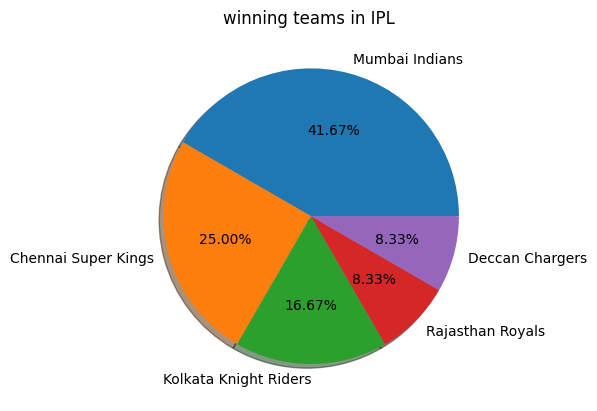

In [33]:
plt.title('winning teams in IPL ')
labels=df_a1['Teams'].tolist()
plt.pie(df_a1['No.of titles'].tolist(), labels= labels,  shadow = True,autopct = '%1.2f%%')
plt.show()

## 13)Which team has won the most no.of matches?

In [34]:
wins={}
for team in Teams:
    c=len(df2[df2['winner']==team])
    wins[team]=c
    
df_team_win=pd.DataFrame(wins.items(),columns=['Teams','No.of wins'])
df_team_win.sort_values(by='No.of wins',ascending=False).head().reset_index(drop=True)

,Teams,No.of wins
0,Mumbai Indians,120
1,Chennai Super Kings,106
2,Kolkata Knight Riders,99
3,Royal Challengers Bangalore,91
4,Kings XI Punjab,88


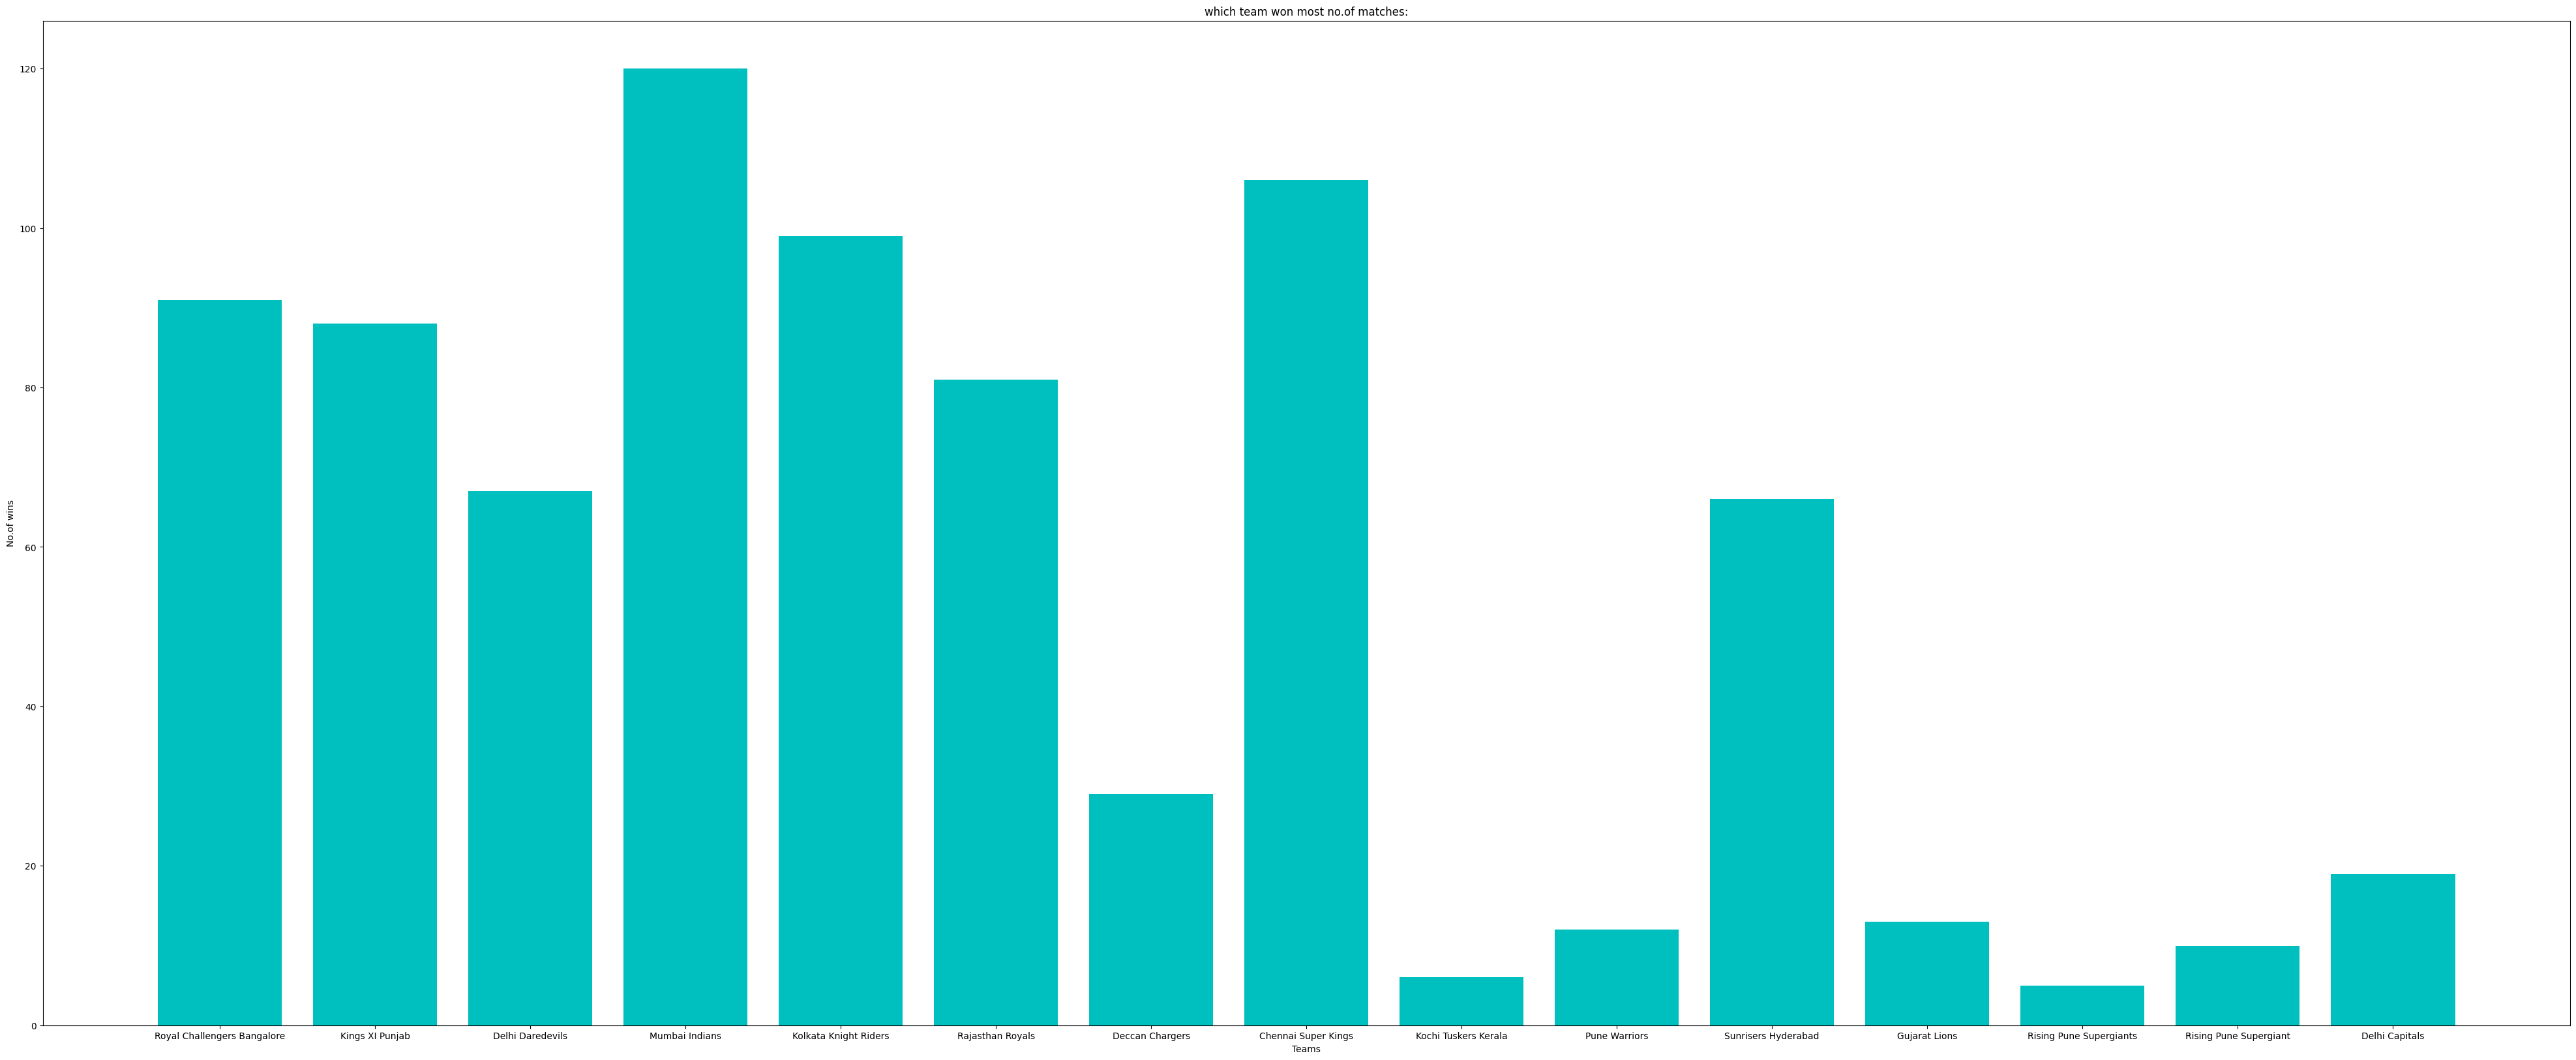

In [35]:
plt.figure(figsize=(50,20))
plt.bar(wins.keys(),wins.values(),color='c')
plt.xlabel('Teams')
plt.ylabel('No.of wins')
plt.title('which team won most no.of matches:')
plt.show()

## 14)Which team has the highest winning percentage?

In [36]:
win_pct={}
for team in Teams:
    win_pct[team]=round((wins[team]/team_matches[team])*100,2)

df_team_winpct=pd.DataFrame(win_pct.items(),columns=['Teams','percentage of wins'])
df_team_winpct=df_team_winpct.sort_values(by='percentage of wins',ascending=False).reset_index(drop=True)
df_team_winpct.head(10)

,Teams,percentage of wins
0,Rising Pune Supergiant,62.50
1,Chennai Super Kings,59.55
2,Mumbai Indians,59.11
3,Delhi Capitals,57.58
4,Sunrisers Hyderabad,53.23
5,Kolkata Knight Riders,51.56
6,Rajasthan Royals,50.31
7,Royal Challengers Bangalore,46.67
8,Kings XI Punjab,46.32
9,Gujarat Lions,43.33


In [37]:
print('*'*63)
print(df_team_winpct['Teams'].tolist()[0],'team has the highest winning percentage')
print('*'*63)


***************************************************************
Rising Pune Supergiant team has the highest winning percentage
***************************************************************


## 15)Is there any lucky venue for a particular team?


In [38]:
Cities=df2['city'].unique()

part_city={}
part_wins={}
final={}
for city in Cities:
    df=df2[df2['city']==city]
    for team in Teams:
        c=len(df[df['winner']==team])
        part_wins[team]=c
    max_wins=max(part_wins.values())
    for i in part_wins:
        if(part_wins[i]==max_wins):
            final[i]=max_wins
    part_city[city]=final
    part_wins={}
    final={}
part_city

{'Bangalore': {'Royal Challengers Bangalore': 29},
 'Chandigarh': {'Kings XI Punjab': 30},
 'Delhi': {'Delhi Daredevils': 27},
 'Mumbai': {'Mumbai Indians': 53},
 'Kolkata': {'Kolkata Knight Riders': 45},
 'Jaipur': {'Rajasthan Royals': 32},
 'Hyderabad': {'Sunrisers Hyderabad': 30},
 'Chennai': {'Chennai Super Kings': 40},
 'Cape Town': {'Deccan Chargers': 2},
 'Port Elizabeth': {'Mumbai Indians': 2, 'Chennai Super Kings': 2},
 'Durban': {'Royal Challengers Bangalore': 3, 'Delhi Daredevils': 3},
 'Centurion': {'Royal Challengers Bangalore': 2,
  'Delhi Daredevils': 2,
  'Rajasthan Royals': 2,
  'Deccan Chargers': 2,
  'Chennai Super Kings': 2},
 'East London': {'Delhi Daredevils': 1,
  'Mumbai Indians': 1,
  'Chennai Super Kings': 1},
 'Johannesburg': {'Royal Challengers Bangalore': 3},
 'Kimberley': {'Kings XI Punjab': 1,
  'Deccan Chargers': 1,
  'Chennai Super Kings': 1},
 'Bloemfontein': {'Kings XI Punjab': 1, 'Delhi Daredevils': 1},
 'Ahmedabad': {'Rajasthan Royals': 7},
 'Cuttac

## 16)Which is the biggest win in terms of run margin?

In [39]:
df_runs=df2[df2['result']=='runs']
max_margin=max(df_runs['result_margin'])
x=df_runs[df_runs['result_margin']==max_margin]['winner'].values
print('-'*85)
print(x[0],'team is biggest win in term of runs margin with  :',max_margin,'runs margin')
print('-'*85)

-------------------------------------------------------------------------------------
Mumbai Indians team is biggest win in term of runs margin with  : 146.0 runs margin
-------------------------------------------------------------------------------------


## 17)Which batsman have played the most no.of balls?

In [40]:
Batsman=df1['batsman'].unique()

count_balls={}
for bat in Batsman:
    balls=len(df1[df1['batsman']==bat])
    count_balls[bat]=balls

df_bat=pd.DataFrame(count_balls.items(),columns=['bat','balls'])

df_bat=df_bat.sort_values(by='balls',ascending=False).reset_index(drop=True)
df_bat.head()

,bat,balls
0,V Kohli,4609
1,S Dhawan,4208
2,RG Sharma,4088
3,SK Raina,4041
4,DA Warner,3819


## 18)Who are the leading runscorers of all time?

In [41]:
count_runs={}
for bat in Batsman:
    df_pr=df1[df1['batsman']==bat]
    runs=df_pr['batsman_runs'].sum()
    count_runs[bat]=runs

df_runs=pd.DataFrame(count_runs.items(),columns=['batsman','runs'])
df_runs=df_runs.sort_values(by='runs',ascending=False).reset_index(drop=True)
df_runs.head()

,batsman,runs
0,V Kohli,5878
1,SK Raina,5368
2,DA Warner,5254
3,RG Sharma,5230
4,S Dhawan,5197


## 19)Who has hit the most no.of fours?

In [42]:
count_fours={}
for bat in Batsman:
    df_prc=df1[df1['batsman']==bat]
    df_prc=df_prc[df_prc['batsman_runs']==4]
    fours=df_prc['batsman_runs'].sum()
    count_fours[bat]=fours//4

df_fours=pd.DataFrame(count_fours.items(),columns=['batsman','fours'])
df_fours=df_fours.sort_values(by='fours',ascending=False).reset_index(drop=True)
df_fours.head()

,batsman,fours
0,S Dhawan,591
1,DA Warner,510
2,V Kohli,504
3,SK Raina,493
4,G Gambhir,492


## 20)Who has hit the most no.of sixers? 

In [43]:
count_sixers={}
for bat in Batsman:
    df_prc=df1[df1['batsman']==bat]
    df_prc=df_prc[df_prc['batsman_runs']==6]
    sixers=df_prc['batsman_runs'].sum()
    count_sixers[bat]=sixers//6

df_sixers=pd.DataFrame(count_sixers.items(),columns=['batsman','sixers'])
df_sixers=df_sixers.sort_values(by='sixers',ascending=False).reset_index(drop=True)
df_sixers.head()

,batsman,sixers
0,CH Gayle,349
1,AB de Villiers,235
2,MS Dhoni,216
3,RG Sharma,214
4,V Kohli,202


## 21)Who has the highest strike rate?

In [44]:
strike_rate={}
for bat in Batsman:
    x=round((count_runs[bat]/count_balls[bat])*100,2)
    strike_rate[bat]=x

df_strike=pd.DataFrame(strike_rate.items(),columns=['batsman','strike rate'])
df_strike=df_strike.sort_values(by='strike rate',ascending=False).reset_index(drop=True)
df_strike.head()

,batsman,strike rate
0,B Stanlake,250.00
1,Umar Gul,205.26
2,RS Sodhi,200.00
3,Shahid Afridi,176.09
4,TU Deshpande,175.00


## 22)Who is the leading wicket taker?

In [45]:

Bowler=df1['bowler'].unique()

count_wickets={}
for bow in Bowler:
    df_prc=df1[df1['bowler']==bow]
    wickets=df_prc['is_wicket'].sum()
    count_wickets[bow]=wickets

df_wic=pd.DataFrame(count_wickets.items(),columns=['bowler','wickets'])
df_wic=df_wic.sort_values(by='wickets',ascending=False).reset_index(drop=True)
df_wic.head()


,bowler,wickets
0,SL Malinga,188
1,DJ Bravo,175
2,A Mishra,169
3,PP Chawla,164
4,Harbhajan Singh,161


## 23)Which stadium has hosted the most number of matches?

In [46]:
Stadium=df2['venue'].unique()

count_mpvenue={}
for std in Stadium:
    c=len(df2[df2['venue']==std])
    count_mpvenue[std]=c

df_std=pd.DataFrame(count_mpvenue.items(),columns=['venus','no.of matches'])
df_std=df_std.sort_values(by='no.of matches',ascending=False).reset_index(drop=True)
df_std.head()



,venus,no.of matches
0,Eden Gardens,77
1,Feroz Shah Kotla,74
2,Wankhede Stadium,73
3,M Chinnaswamy Stadium,65
4,"Rajiv Gandhi International Stadium, Uppal",64


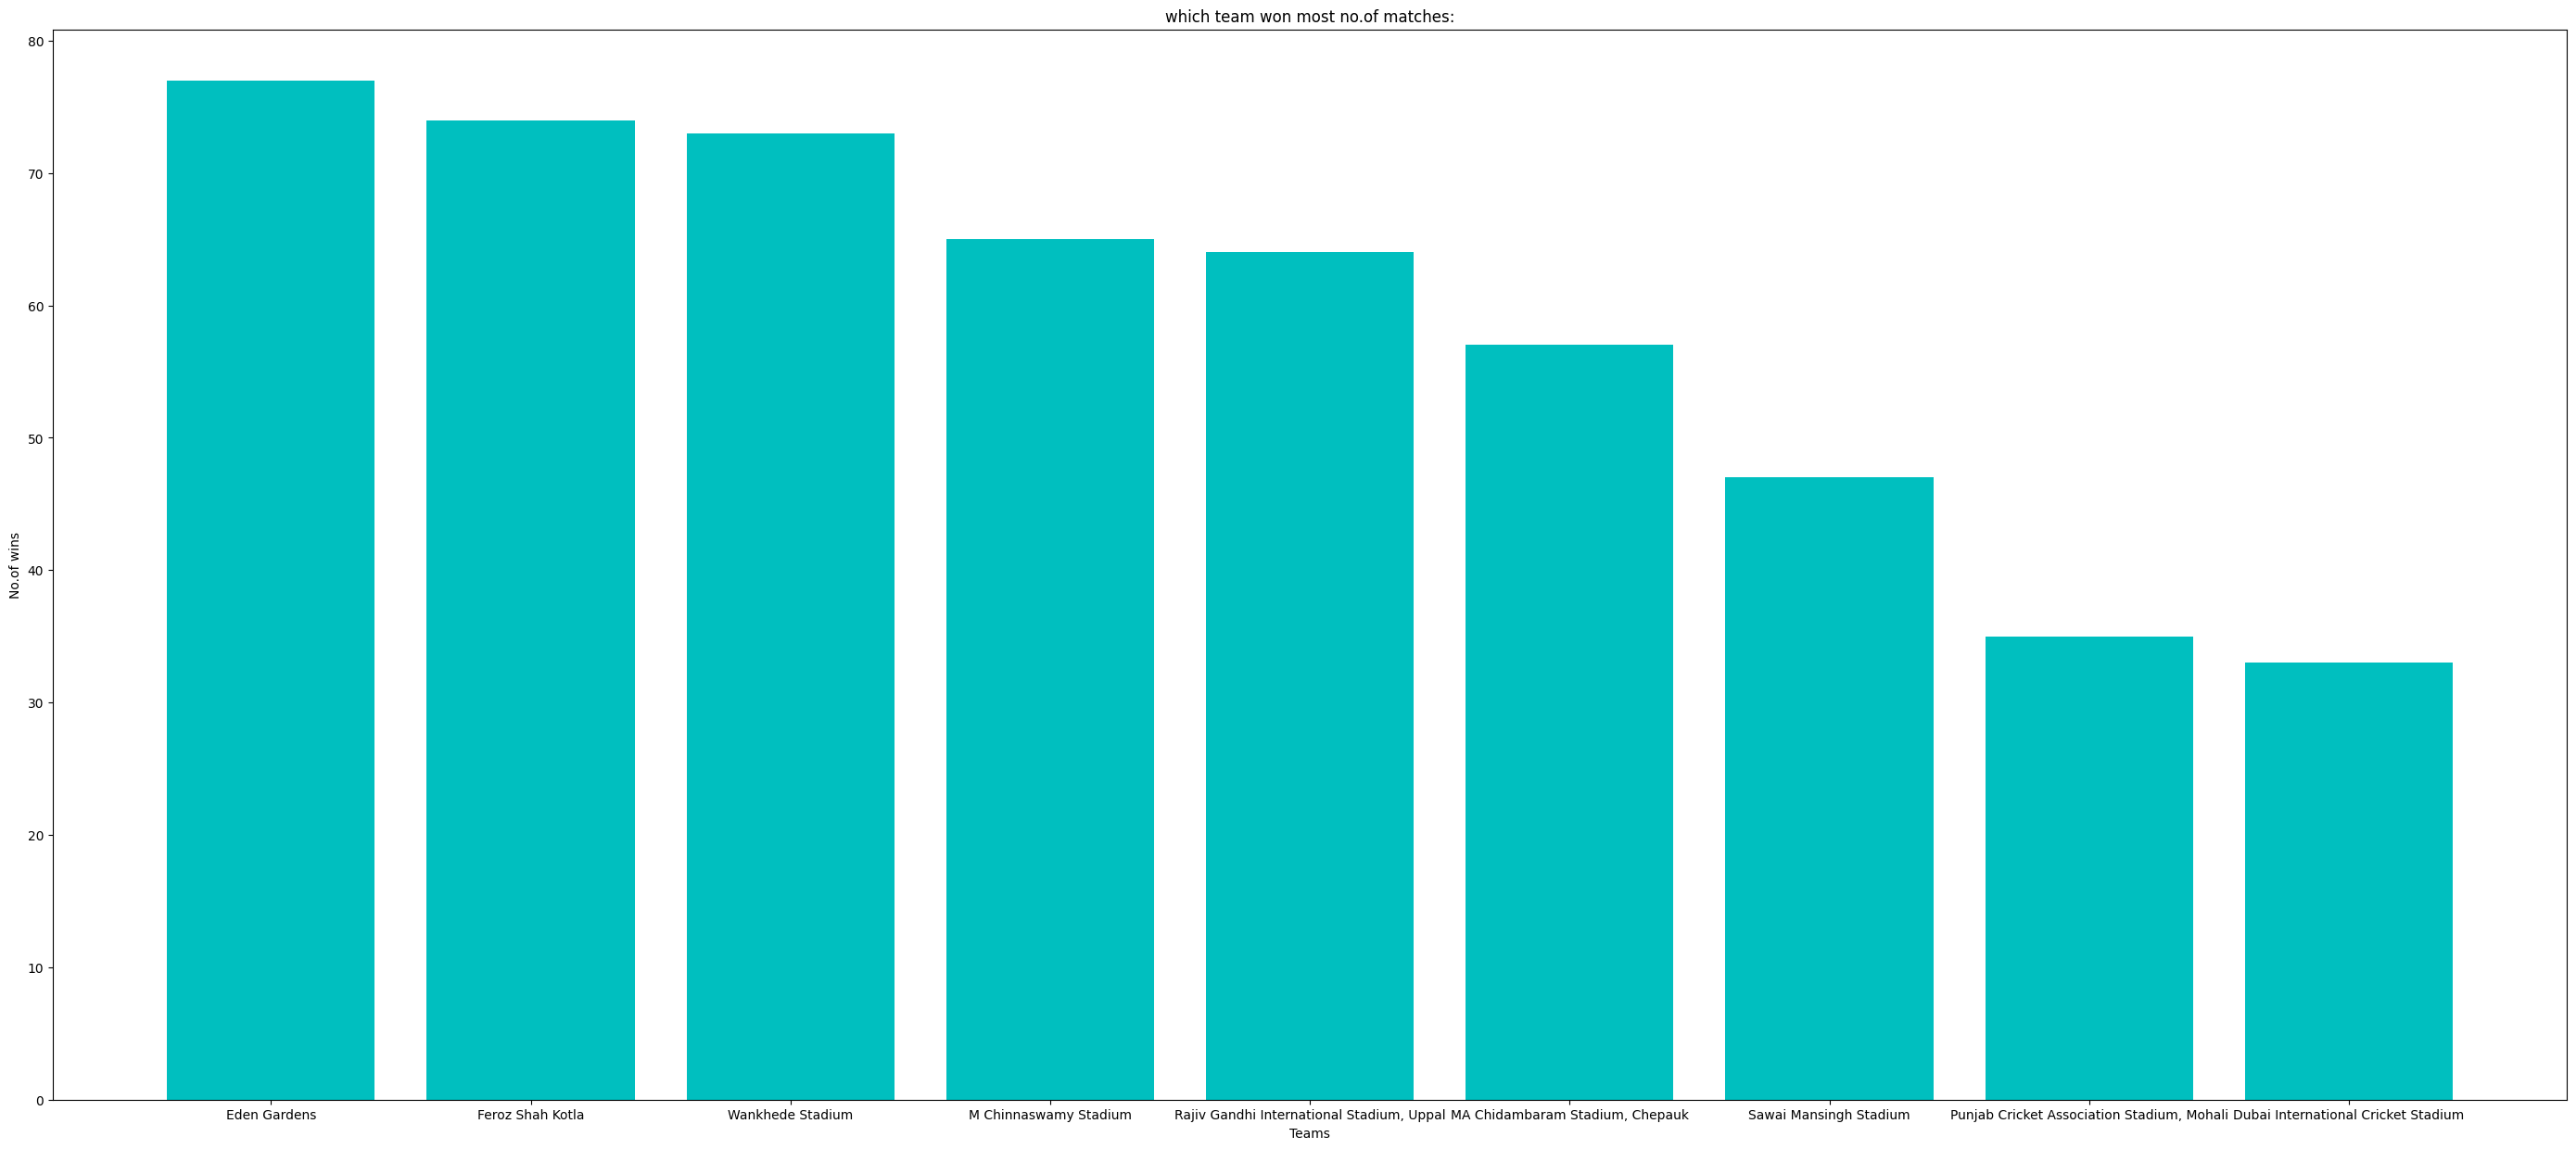

In [47]:
plt.figure(figsize=(35,15))
plt.bar(df_std['venus'].tolist()[:9],df_std['no.of matches'].tolist()[:9],color='c')
plt.xlabel('Teams')
plt.ylabel('No.of wins')
plt.title('which team won most no.of matches:')
plt.show()


## 24)What is count of fours hit in each season?

In [48]:
count_nps_fours={}
count=0
for year in years:
    df_pr=df2[df2['Year']==year]
    ids=list(df_pr['id'])
    for i in ids:
        df_id=df1[df1['id']==i]
        count+=len(df_id[df_id['batsman_runs']==4])
    count_nps_fours[year]=count
    count=0
df = pd.DataFrame(list(zip(list(count_nps_fours.keys()),list(count_nps_fours.values()))), columns =['Year','no.of fours']) 
df

,Year,no.of fours
0,2008,1703
1,2009,1317
2,2010,1708
3,2011,1916
4,2012,1911
5,2013,2052
6,2014,1562
7,2015,1607
8,2016,1633
9,2017,1611


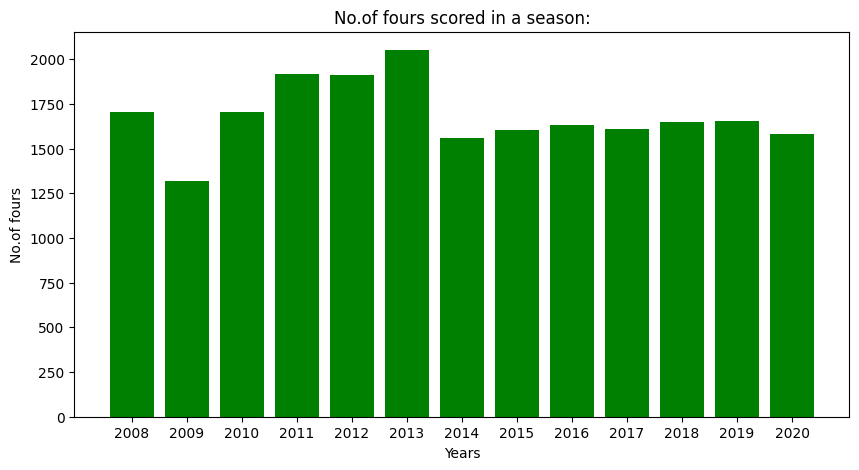

In [49]:
plt.figure(figsize=(10,5))
plt.bar(count_nps_fours.keys(),count_nps_fours.values(),color='g')
plt.xlabel('Years')
plt.ylabel('No.of fours')
plt.title('No.of fours scored in a season:')
plt.show()

## 25)What is the count of sixers hit in each season?

In [50]:
count_nps_sixers={}
count=0
for year in years:
    df_pr=df2[df2['Year']==year]
    ids=list(df_pr['id'])
    for i in ids:
        df_id=df1[df1['id']==i]
        count+=len(df_id[df_id['batsman_runs']==6])
    count_nps_sixers[year]=count
    count=0
df = pd.DataFrame(list(zip(list(count_nps_sixers.keys()),list(count_nps_sixers.values()))), columns =['Year','no.of sixers']) 
df


,Year,no.of sixers
0,2008,623
1,2009,506
2,2010,585
3,2011,639
4,2012,733
5,2013,675
6,2014,714
7,2015,692
8,2016,639
9,2017,705


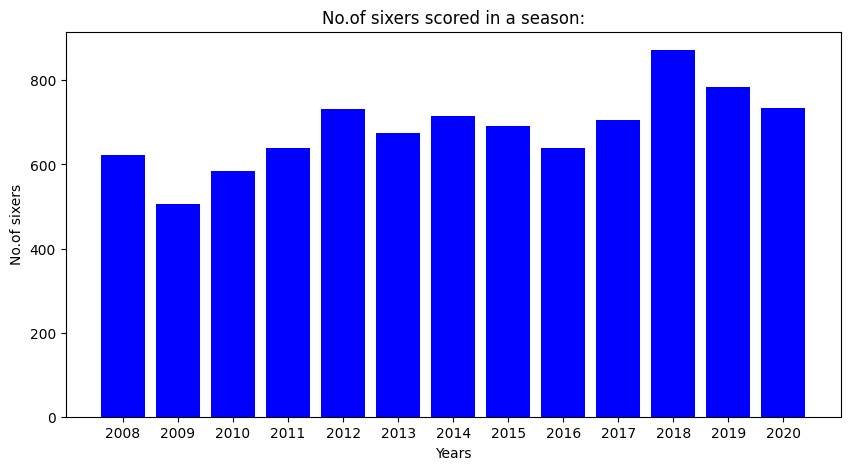

In [51]:
plt.figure(figsize=(10,5))
plt.bar(count_nps_sixers.keys(),count_nps_sixers.values(),color='b')
plt.xlabel('Years')
plt.ylabel('No.of sixers')
plt.title('No.of sixers scored in a season:')
plt.show()


## 26)What is the count of runs scored from boundaries in each season?


In [52]:

count_nps_boundaries={}
count=0
for year in years:
    df_pr=df2[df2['Year']==year]
    ids=list(df_pr['id'])
    for i in ids:
        df_id=df1[df1['id']==i]
        count+=len(df_id[df_id['batsman_runs']==4])*4
        count+=len(df_id[df_id['batsman_runs']==6])*6
    count_nps_boundaries[year]=count
    count=0
df = pd.DataFrame(list(zip(list(count_nps_boundaries.keys()),list(count_nps_boundaries.values()))), columns =['Year','no.of boundaries']) 
df

,Year,no.of boundaries
0,2008,10550
1,2009,8304
2,2010,10342
3,2011,11498
4,2012,12042
5,2013,12258
6,2014,10532
7,2015,10580
8,2016,10366
9,2017,10674


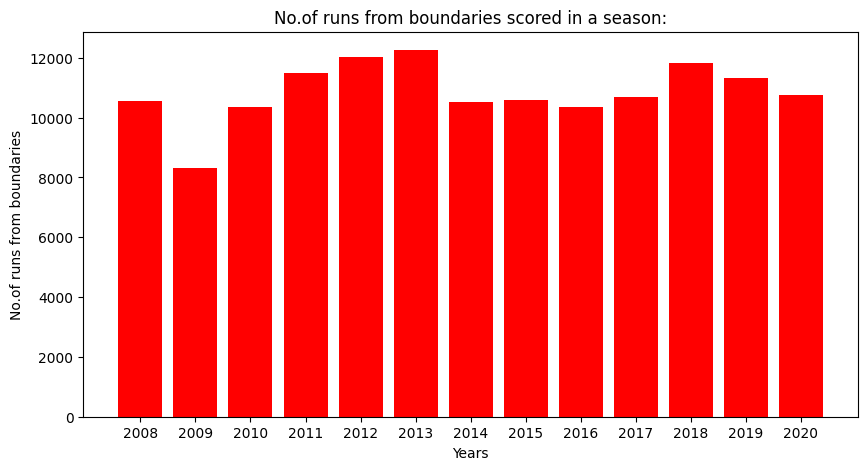

In [53]:
plt.figure(figsize=(10,5))
plt.bar(count_nps_boundaries.keys(),count_nps_boundaries.values(),color='r')
plt.xlabel('Years')
plt.ylabel('No.of runs from boundaries')
plt.title('No.of runs from boundaries scored in a season:')
plt.show()
